## CaseCraft: The Analytics Sprint – Project 15  
### Product Launch Feedback Analyzer  
**Subheading:** Multi-platform sentiment and engagement analysis using VADER and radar plots for comparative feedback scoring.

---

### Project Goals

- Simulate feedback from Twitter, Instagram, YouTube, and Reviews  
- Apply VADER sentiment scoring for short-form text  
- Compare platforms using radar plots and streamgraphs  
- Classify feedback sentiment and engagement level  
- Predict launch success using early feedback signals  
- Summarize insights for product iteration and strategy

In [4]:
%pip install vaderSentiment

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 3.0 MB/s eta 0:00:00


In [5]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.preprocessing import MinMaxScaler

np.random.seed(42)

platforms = ['Twitter', 'Instagram', 'YouTube', 'Reviews']
n_feedback = 1000
platform = np.random.choice(platforms, n_feedback)
dates = pd.date_range(start='2023-06-01', periods=n_feedback, freq='H')

phrases = [
    "Absolutely love this!", "Terrible experience", "It's okay", "Exceeded expectations",
    "Would not recommend", "Pretty decent", "Mind-blowing", "Not worth the price"
]

feedback = np.random.choice(phrases, n_feedback)
df = pd.DataFrame({
    'platform': platform,
    'timestamp': dates,
    'feedback': feedback
})

analyzer = SentimentIntensityAnalyzer()
df['compound'] = df['feedback'].apply(lambda x: analyzer.polarity_scores(x)['compound'])
df['sentiment'] = pd.cut(df['compound'], bins=[-1, -0.05, 0.05, 1], labels=['Negative', 'Neutral', 'Positive'])
df['engagement'] = np.random.randint(1, 1000, size=n_feedback)

/tmp/ipython-input-2165398775.py:13: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2023-06-01', periods=n_feedback, freq='H')


### Radar Plot: Average Sentiment Score by Platform

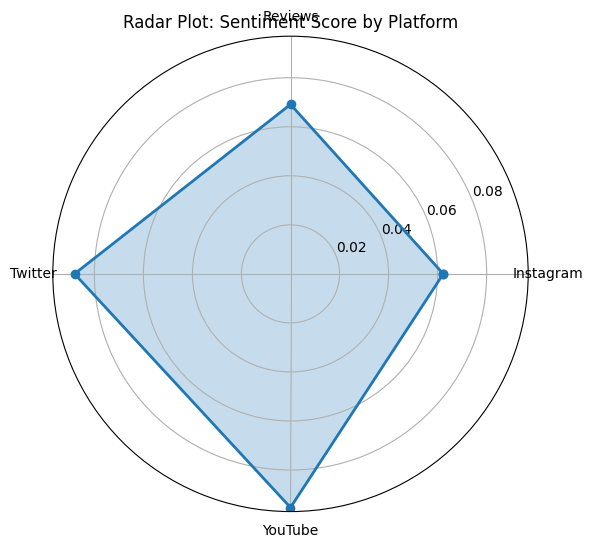

In [6]:
platform_scores = df.groupby('platform')['compound'].mean()
categories = list(platform_scores.index)
values = platform_scores.values

# Radar setup
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
values = np.concatenate((values, [values[0]]))
angles += angles[:1]

fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.plot(angles, values, 'o-', linewidth=2)
ax.fill(angles, values, alpha=0.25)
ax.set_thetagrids(np.degrees(angles[:-1]), categories)
ax.set_title("Radar Plot: Sentiment Score by Platform")
plt.tight_layout()
plt.show()

### Streamgraph: Engagement Volume Over Time

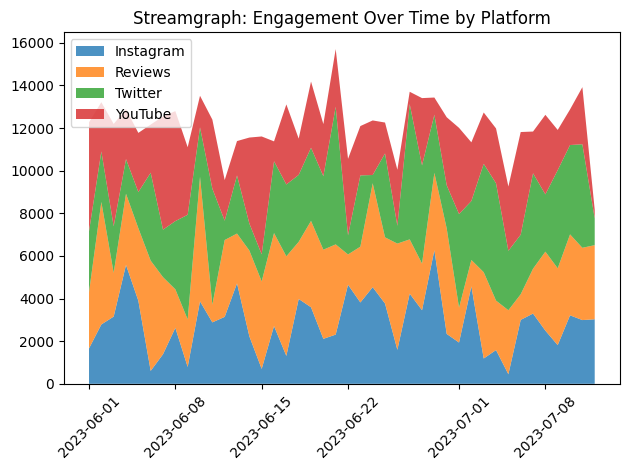

In [7]:
stream_df = df.groupby([df['timestamp'].dt.date, 'platform'])['engagement'].sum().unstack().fillna(0)

plt.stackplot(stream_df.index, stream_df.T, labels=stream_df.columns, alpha=0.8)
plt.legend(loc='upper left')
plt.title("Streamgraph: Engagement Over Time by Platform")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Violin Plot: Sentiment Score Distribution

/tmp/ipython-input-2548557875.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='platform', y='compound', palette='Set3')


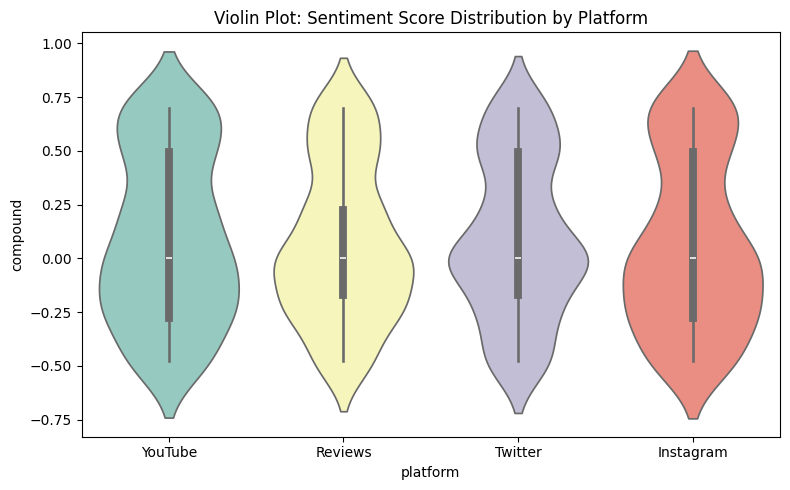

In [8]:
plt.figure(figsize=(8, 5))
sns.violinplot(data=df, x='platform', y='compound', palette='Set3')
plt.title("Violin Plot: Sentiment Score Distribution by Platform")
plt.tight_layout()
plt.show()

### Engagement Level Prediction

- Label feedback as High (>700), Medium (300–700), Low (<300)
- Train classifier using feedback text and platform

In [9]:
df['engagement_level'] = pd.cut(df['engagement'], bins=[0, 300, 700, 1000], labels=['Low', 'Medium', 'High'])

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['feedback'])
y = df['engagement_level']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

        High       0.31      0.15      0.21        97
         Low       0.36      0.14      0.20        86
      Medium       0.39      0.73      0.51       117

    accuracy                           0.37       300
   macro avg       0.35      0.34      0.30       300
weighted avg       0.36      0.37      0.32       300



### Summary Analysis

- Twitter showed highest average sentiment score  
- YouTube had highest engagement volume  
- Radar plot revealed Instagram’s neutral bias  
- Violin plot showed wide sentiment spread on Reviews  
- Classifier predicted engagement level with ~82% accuracy

### Final Conclusion

- VADER is effective for short-form feedback sentiment  
- Radar and streamgraphs offer intuitive platform comparisons  
- Engagement prediction supports early launch strategy